In [1]:
# only adjust settings in this cell
state = 'KS' 
year = 2020
enumeration_limit = 10

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of KS has 4 districts.


In [5]:
from optimization import iterative_refinement
from math import ceil, floor
from metrics import *
import time

deviation = 1/2
max_deviation = 0.01 * ideal_population
plans = list()
first_feasible_dev = None

while True:

    print("*****************************************")
    print(f"Trying deviation = {deviation}.")
    print("*****************************************")
    
    L = ceil( ideal_population - deviation )
    U = floor( ideal_population + deviation )

    start_time = time.perf_counter()
    new_plans = iterative_refinement(G, L, U, G._k, state, enumeration_limit=enumeration_limit, verbose=False)
    print("Total time =",round(time.perf_counter() - start_time,2))
    
    if new_plans:
        plans += new_plans
        if first_feasible_dev is None:
            min_observed_dev = min(observed_deviation_persons(G, plan, ideal_population) for plan in new_plans)
            first_feasible_dev = min_observed_dev
            

    if deviation == max_deviation:
        break
    
    deviation *= 2
    deviation = min( deviation, max_deviation )
       

*****************************************
Trying deviation = 0.5.
*****************************************
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
Total time = 16579.85
*****************************************
Trying deviation = 1.0.
*****************************************
Total time = 3217.73
*****************************************
Trying deviation = 2.0.
*****************************************
Total time = 2679.77
*****************************************
Trying deviation = 4.0.
*****************************************
Total time = 2116.65
*****************************************
Trying deviation = 8.0.
*****************************************
Total time = 6070.56
*****************************************
Trying deviation = 16.0.
*****************************************
Total time = 4285.85
*****************************************
Trying deviation = 32.0.
*****************************************
Total time = 3210.33
***

In [6]:
infeasible_region = [0, first_feasible_dev] if first_feasible_dev > 0.5 else None
print(f"Infeasible region is: {infeasible_region}")

Infeasible region is: [0, 4.0]


***************************************
obj_type = cut_edges
***************************************
Pareto front objective values: [[4.0, 76], [4.0, 76], [7.0, 64], [8.0, 51], [53.0, 50], [81.0, 48], [150.0, 44], [235.0, 43], [282.0, 42], [295.0, 41], [295.0, 41], [295.0, 41], [315.0, 38], [937.0, 37], [1059.0, 35], [2464.0, 34], [3237.0, 33], [4115.0, 32]]


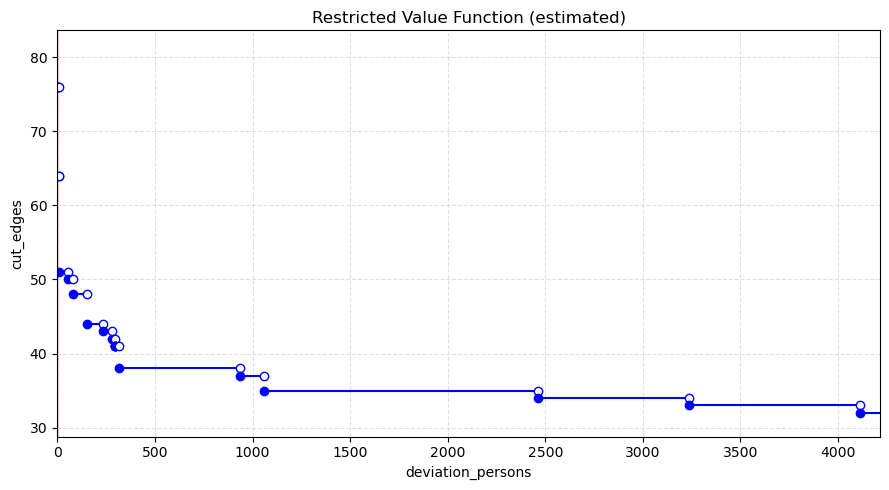

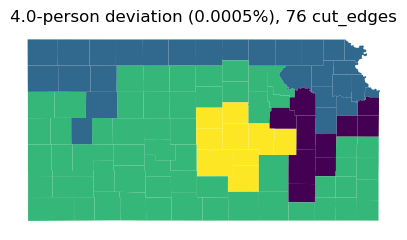

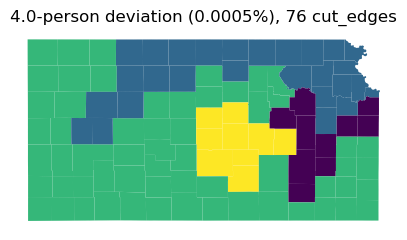

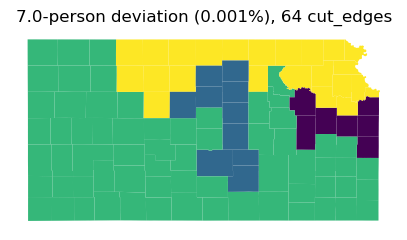

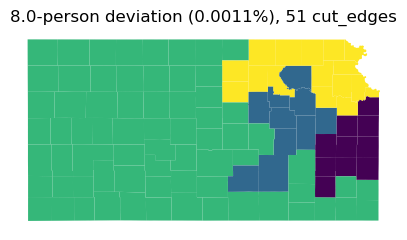

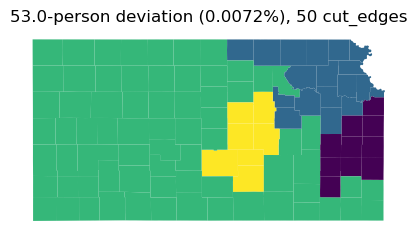

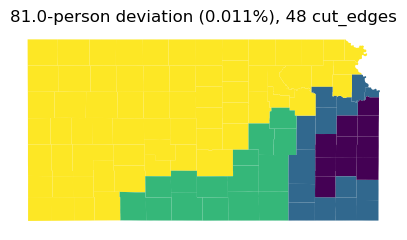

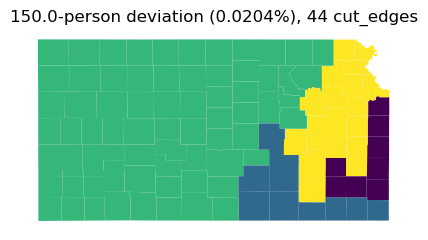

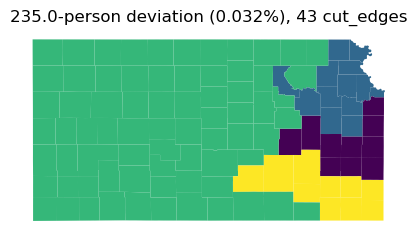

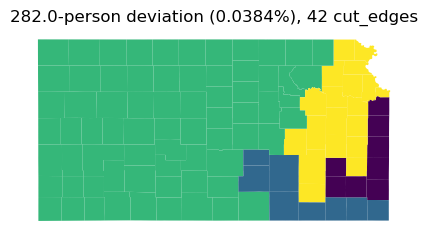

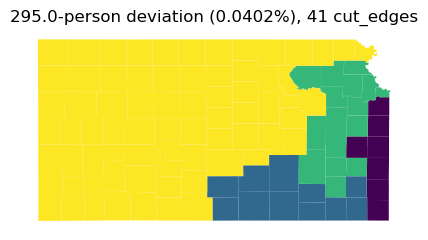

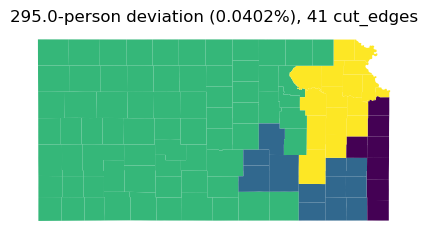

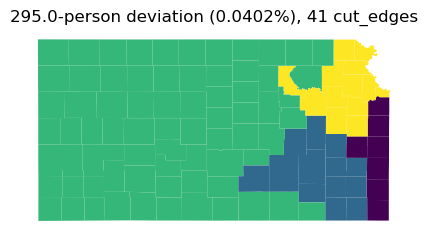

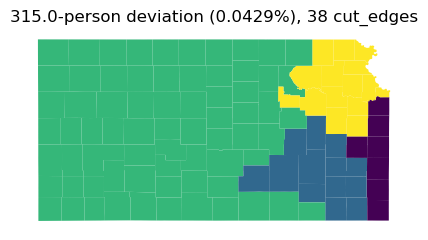

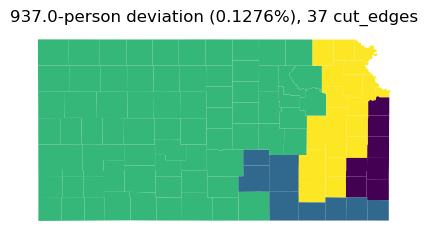

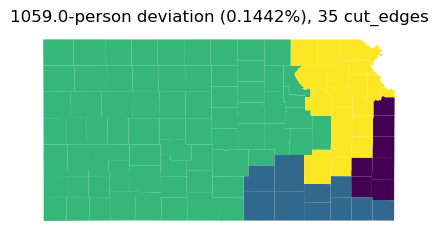

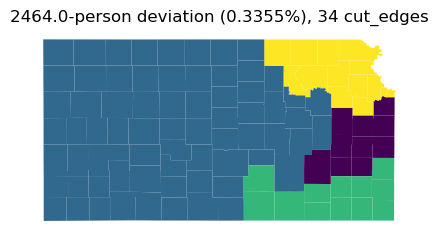

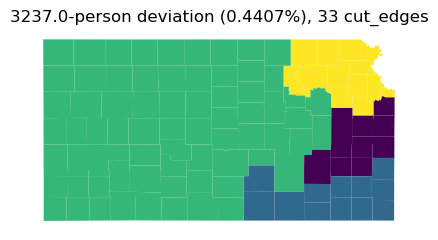

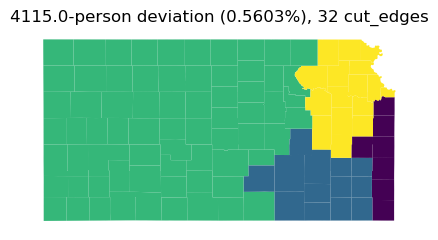

***************************************
obj_type = perimeter
***************************************
Pareto front objective values: [[4.0, 68.38522320674049], [5.0, 67.95823324424717], [7.0, 61.016468780018755], [8.0, 53.56455353648915], [27.0, 52.847541874854976], [32.0, 52.49411678955266], [46.0, 51.68205412440069], [81.0, 50.38657935925994], [97.0, 50.365479871287036], [150.0, 47.12073714591785], [282.0, 46.509660449543716], [295.0, 45.90598553224105], [383.0, 45.51909963784082], [494.0, 45.36325761077165], [504.0, 42.99954930834638], [937.0, 42.99358271107732], [1105.0, 41.84190786300035], [4190.0, 41.30982850428849], [5439.0, 41.09627559902399], [5822.0, 39.847545950913265]]


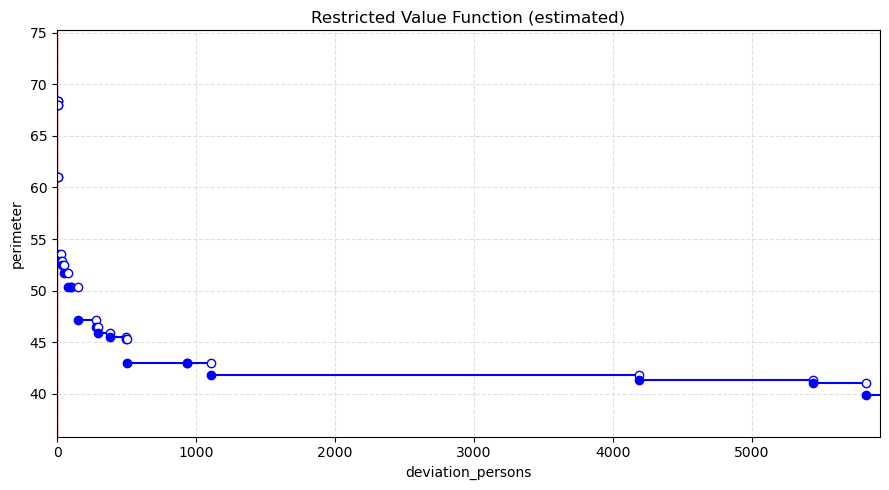

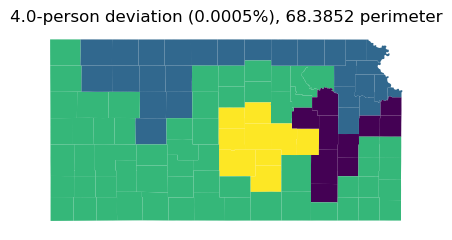

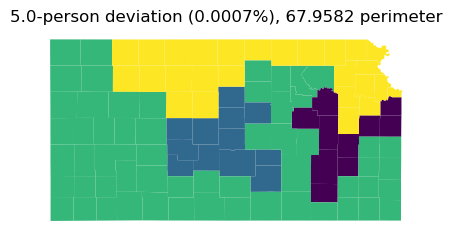

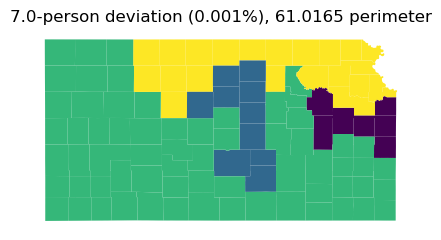

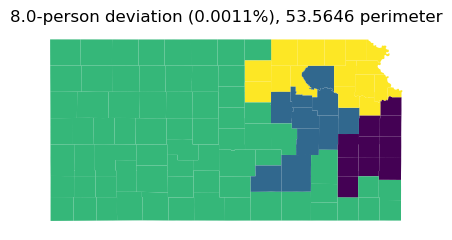

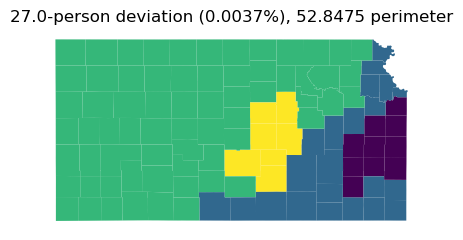

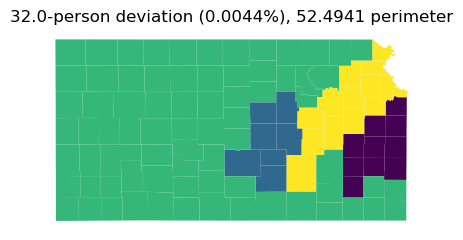

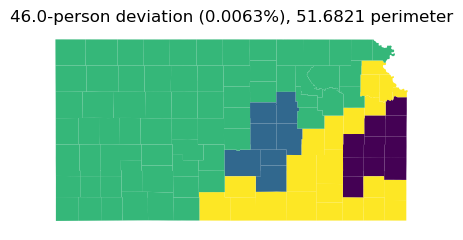

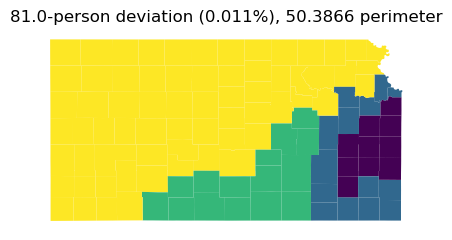

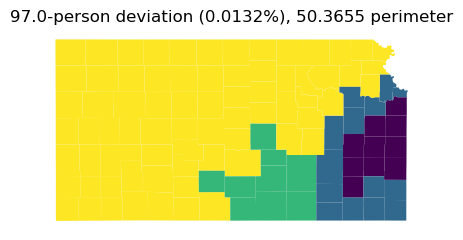

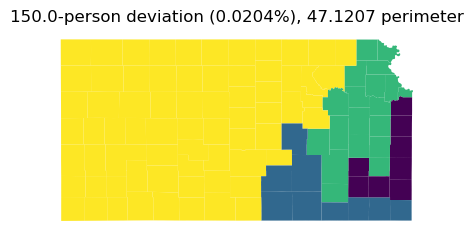

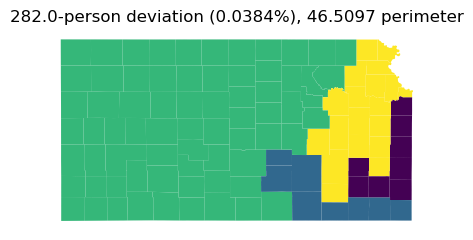

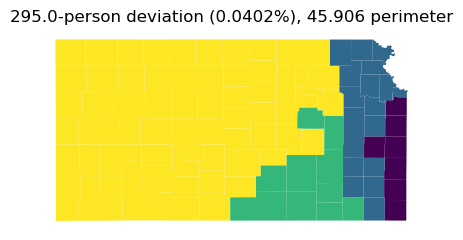

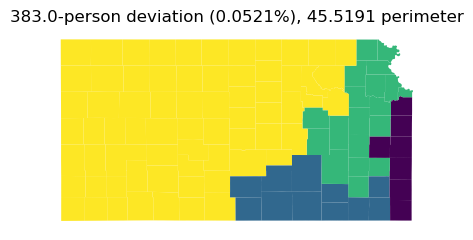

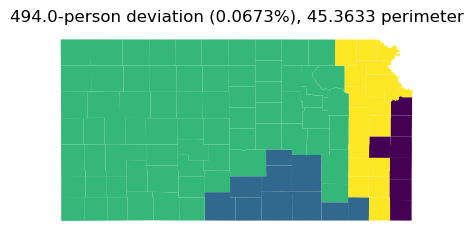

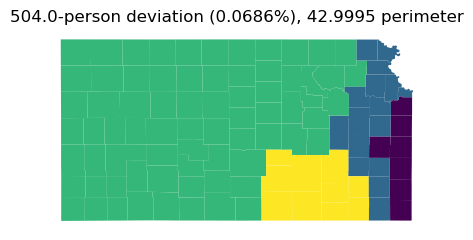

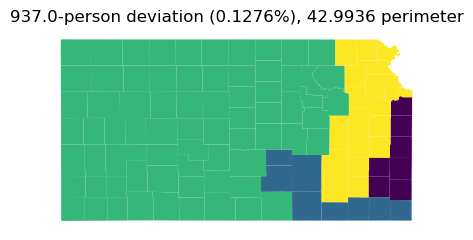

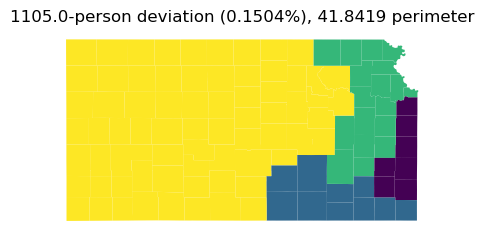

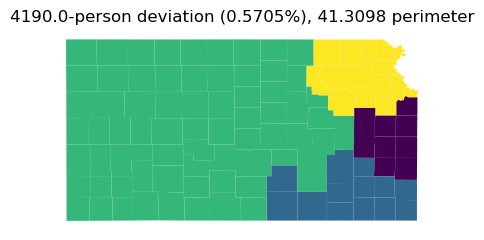

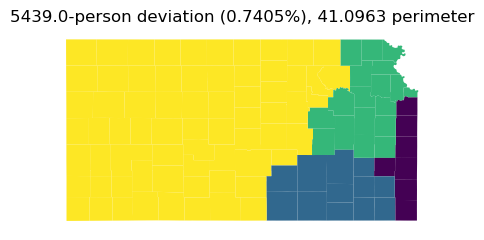

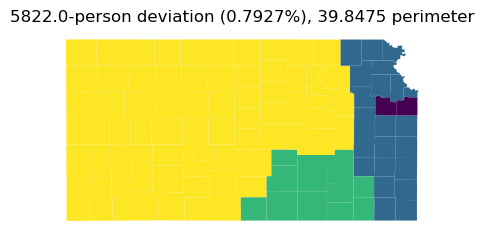

***************************************
obj_type = inverse_Polsby_Popper
***************************************
Pareto front objective values: [[4.0, 4.676242457424785], [5.0, 4.629658994211127], [7.0, 4.034614919592191], [8.0, 3.277869785914562], [10.0, 3.2296823017692553], [11.0, 3.1602638021257228], [21.0, 3.137438438274912], [22.0, 3.049612246003658], [38.0, 3.0467446883880775], [124.0, 3.0190333798739406], [167.0, 2.9941488132211056], [224.0, 2.7791069078960327], [235.0, 2.66599430656135], [368.0, 2.6311046460146237], [900.0, 2.568482312004412], [937.0, 2.4296627320310877], [1105.0, 2.392628627386489], [1694.0, 2.361255287801487], [1869.0, 2.3471116613240466], [3811.0, 2.27134529907396], [4190.0, 2.1448947206516578], [7226.0, 2.1405350324816235], [7305.0, 2.13795776648982]]


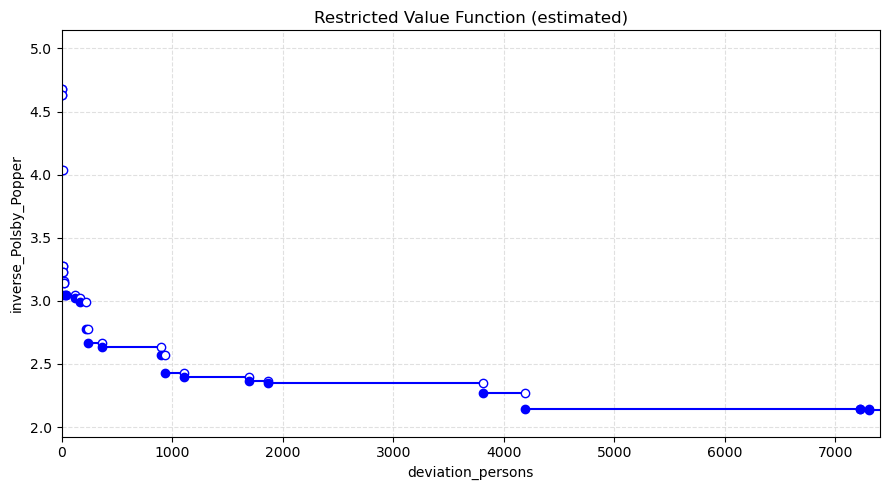

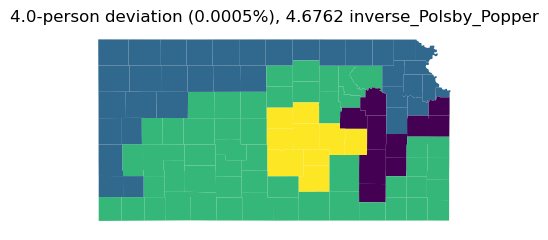

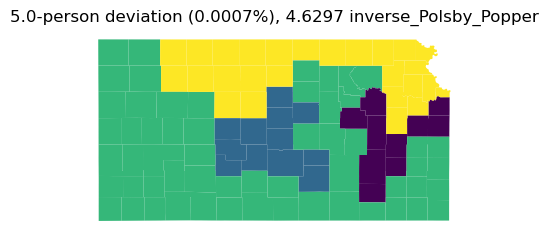

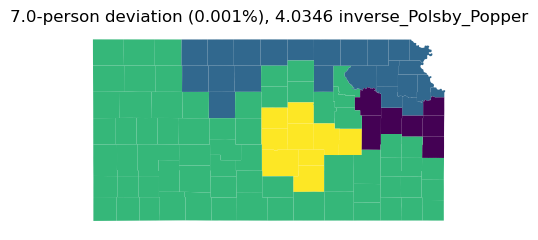

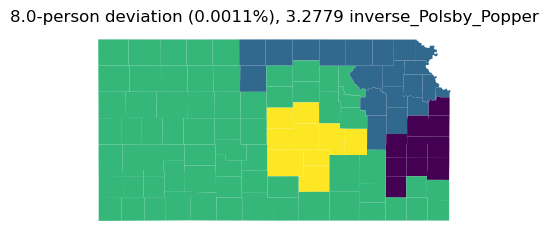

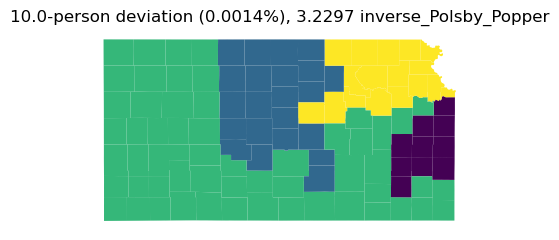

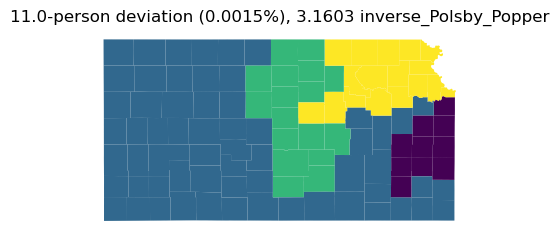

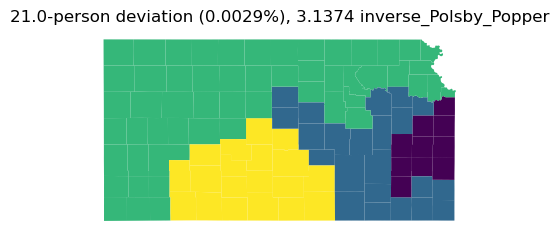

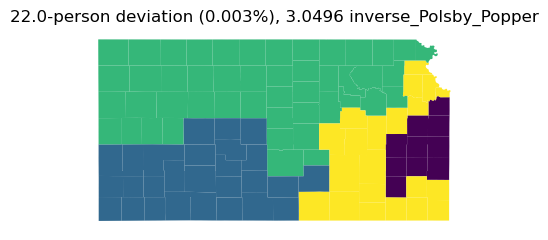

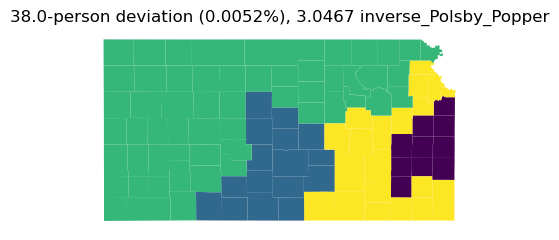

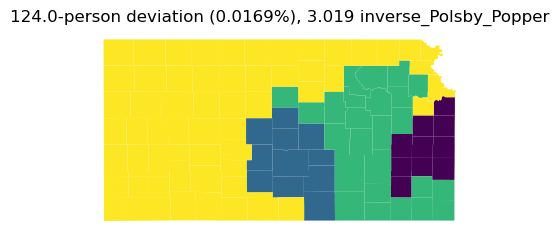

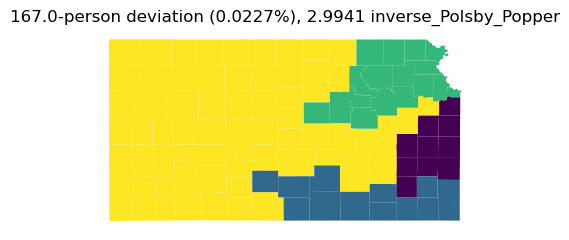

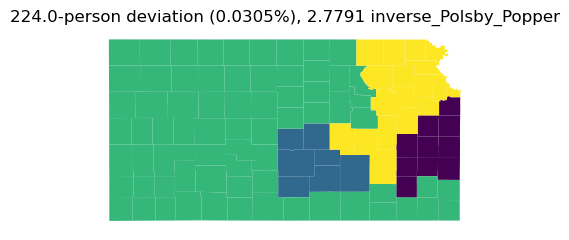

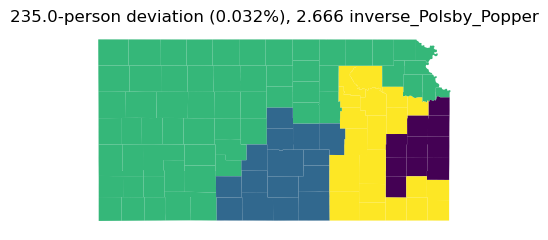

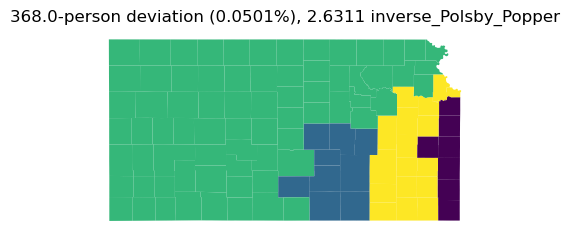

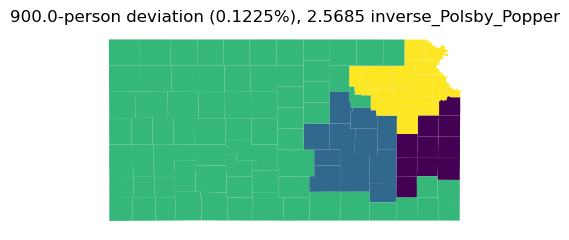

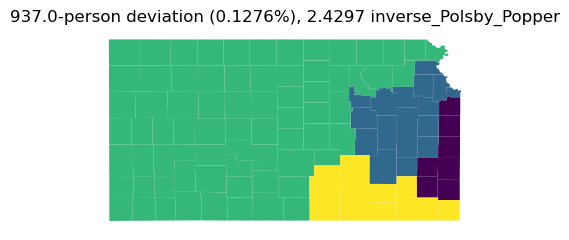

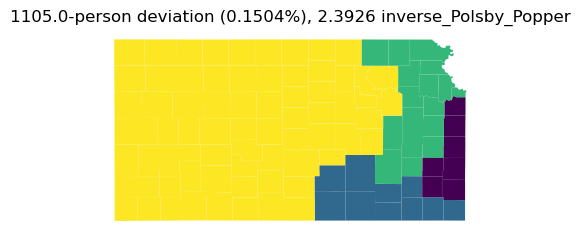

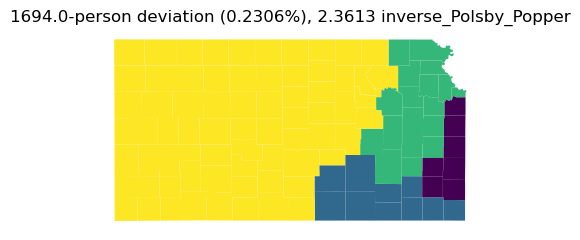

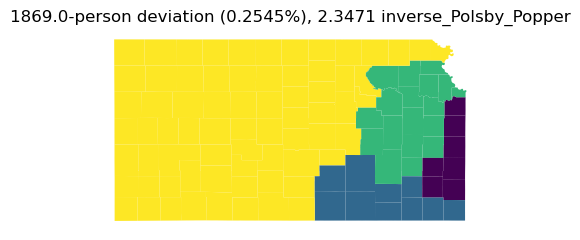

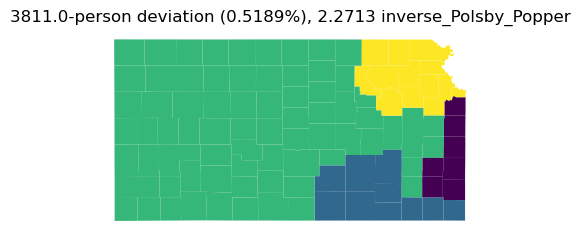

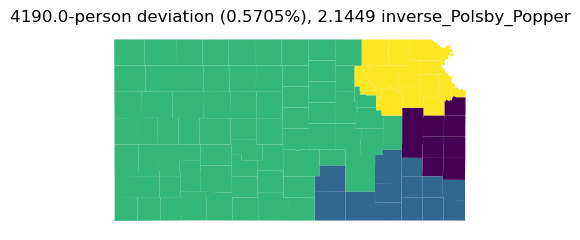

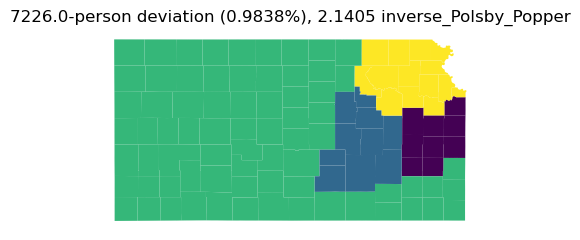

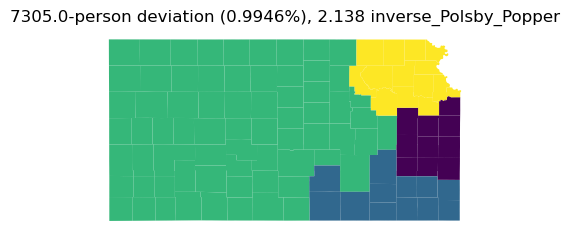

***************************************
obj_type = average_Polsby_Popper
***************************************
Pareto front objective values: [[4.0, 0.26324525384525777], [7.0, 0.28921351117650784], [8.0, 0.36827599134836797], [15.0, 0.3724224779983085], [21.0, 0.3762069526799239], [24.0, 0.3826738042107315], [211.0, 0.39548167880472646], [224.0, 0.4018754759412317], [323.0, 0.4032807883360168], [466.0, 0.41200889239859045], [504.0, 0.4411468762680403], [1105.0, 0.4459319833559545], [2385.0, 0.44805586858028057], [2431.0, 0.4540923351714673], [4019.0, 0.45806021879495556], [4190.0, 0.4764994815433573], [7226.0, 0.47794016039564935], [7305.0, 0.48437357133142717]]


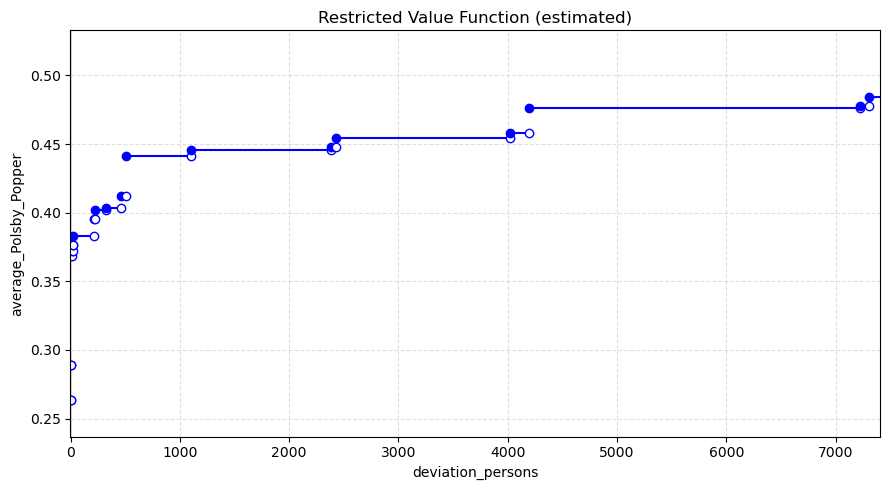

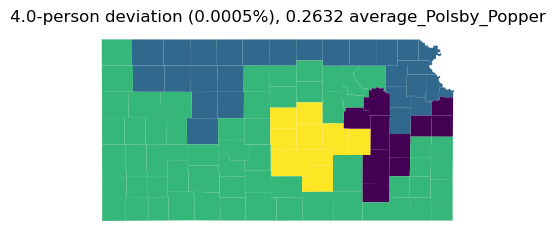

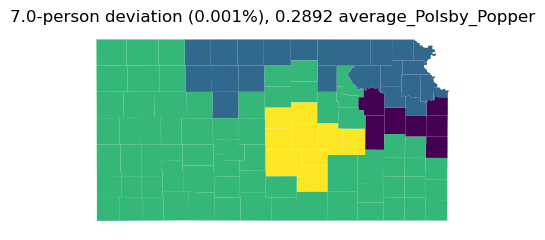

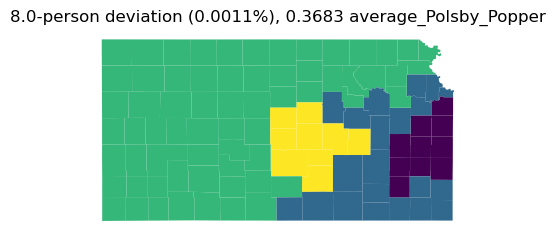

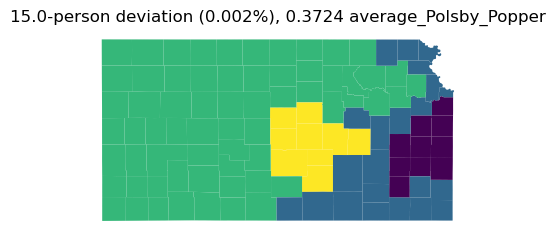

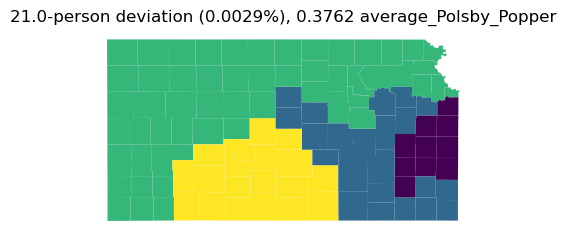

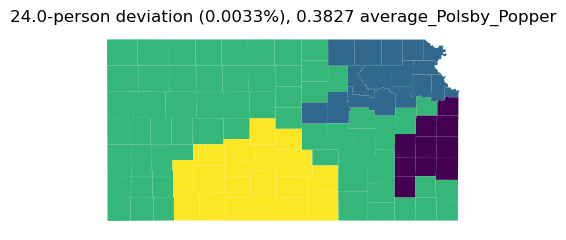

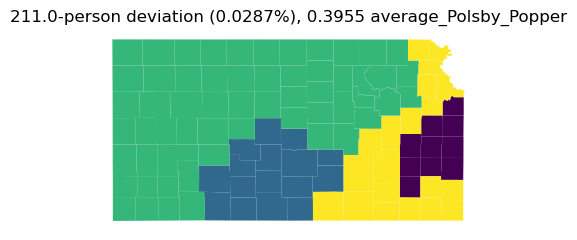

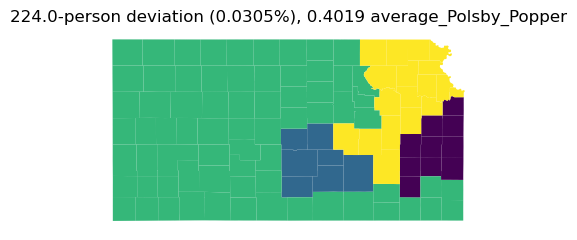

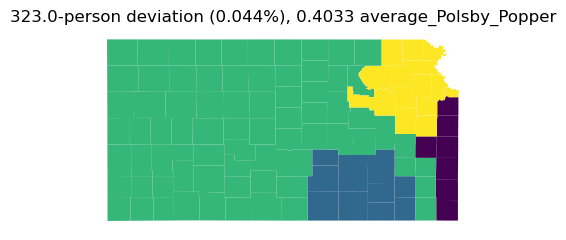

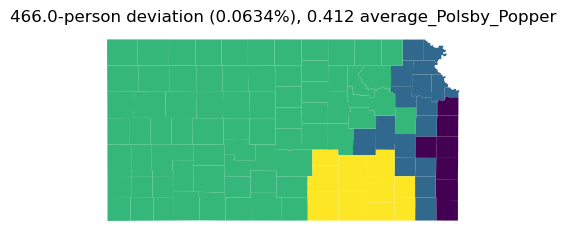

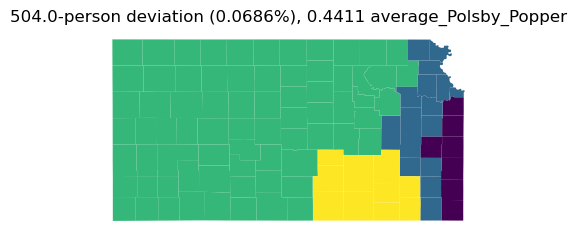

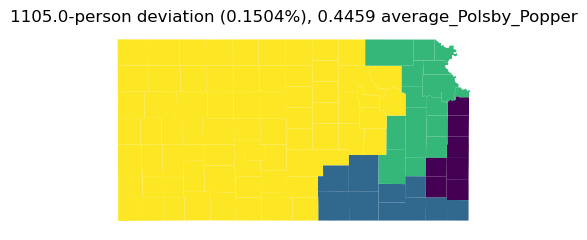

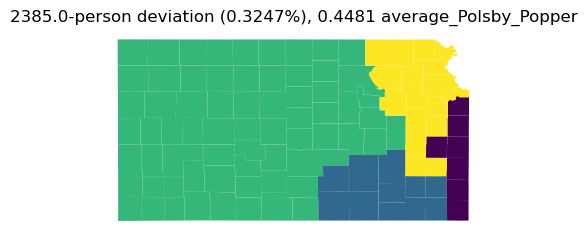

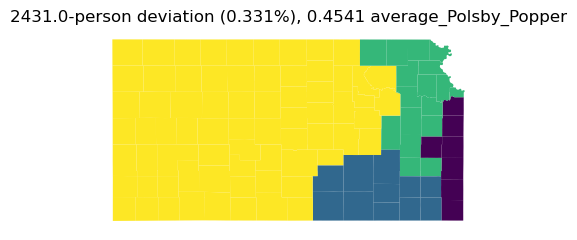

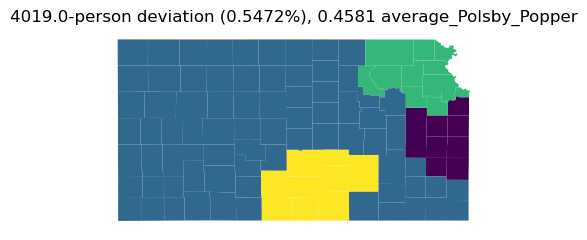

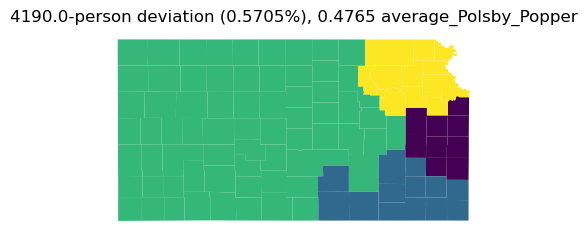

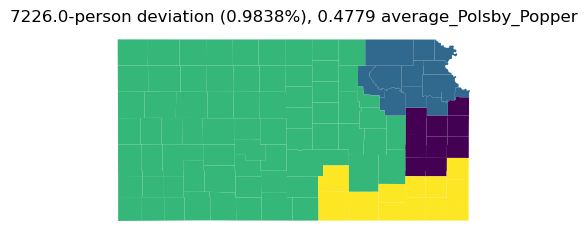

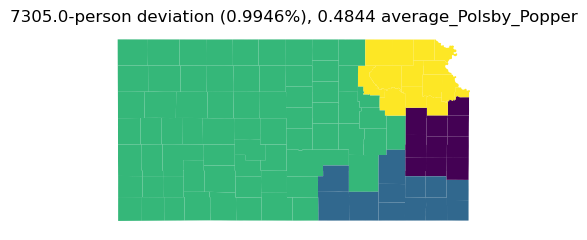

***************************************
obj_type = bottleneck_Polsby_Popper
***************************************
Pareto front objective values: [[4.0, 0.1592434535184309], [5.0, 0.1705326740884489], [7.0, 0.20010494922961838], [8.0, 0.22869378740338384], [32.0, 0.24013055646264508], [53.0, 0.24056392599984738], [53.0, 0.24056392599984738], [94.0, 0.24679340422354293], [150.0, 0.2776124508089337], [163.0, 0.30661022672093785], [235.0, 0.31263576362630746], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [368.0, 0.32348117671654253], [412.0, 0.34518901542370445], [937.0, 0.3663492360061187], [1798.0, 0.3810935297827451], [1869.0, 0.39779942779577276], [3811.0, 0.4347169597651818], [7131.0, 0.4385492364569628]]


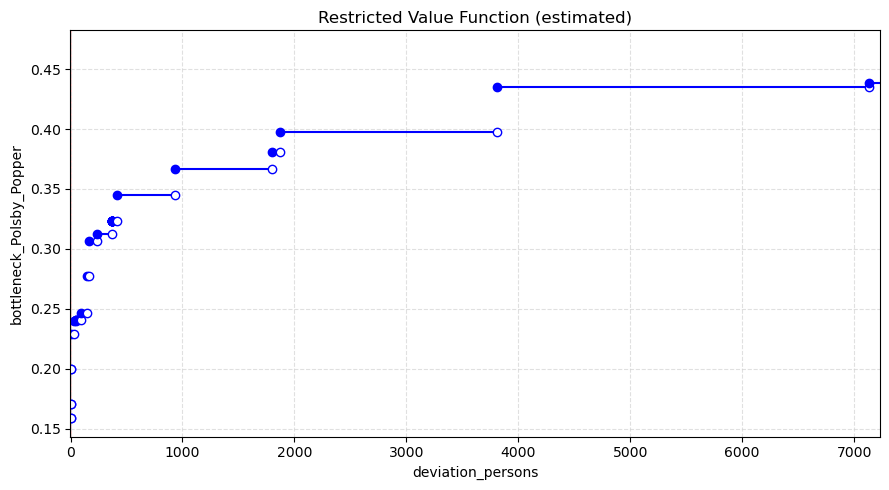

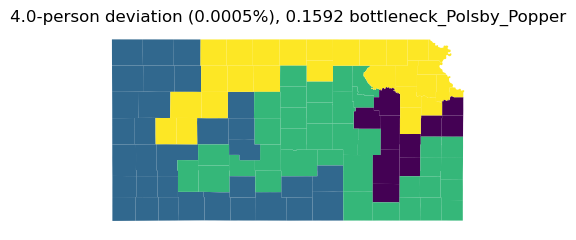

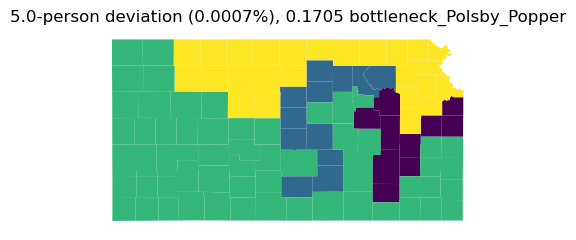

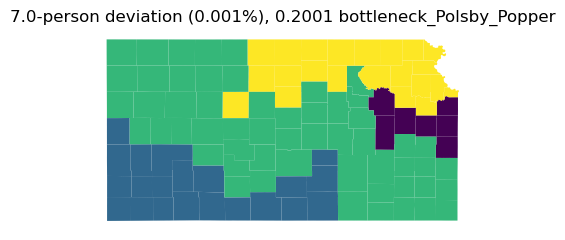

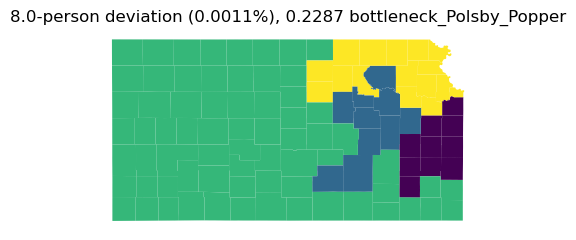

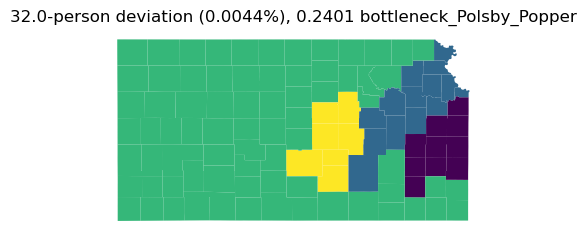

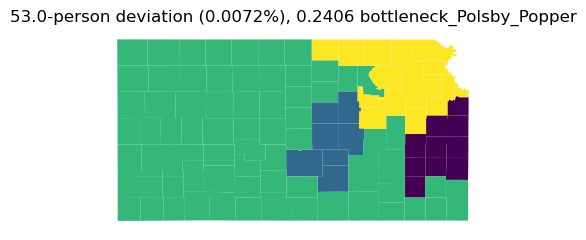

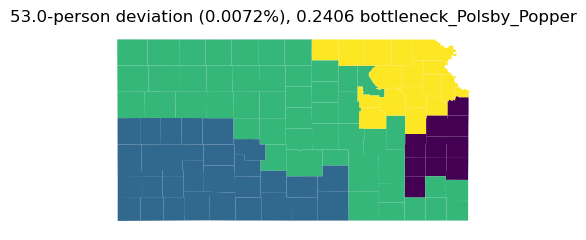

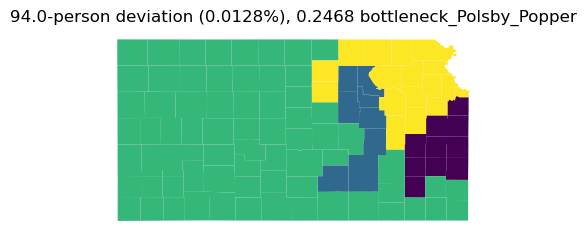

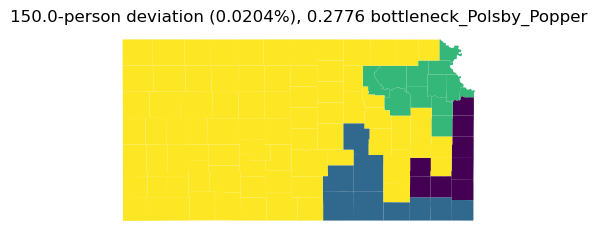

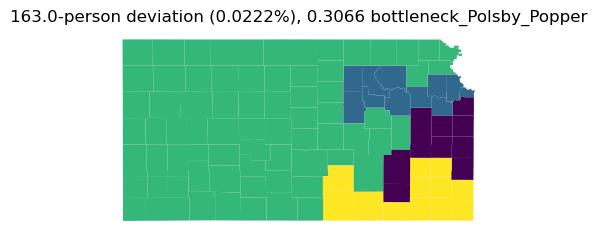

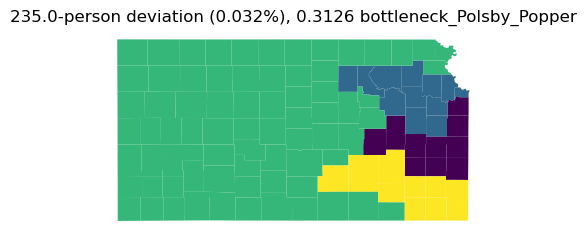

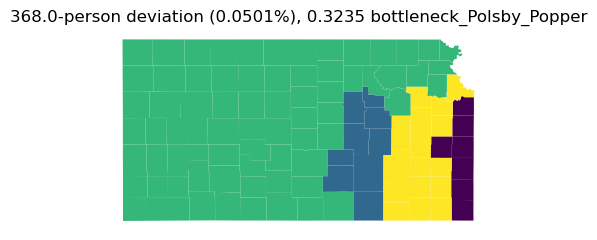

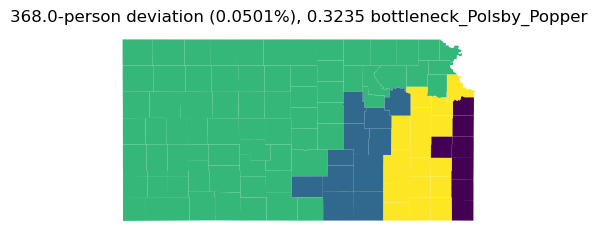

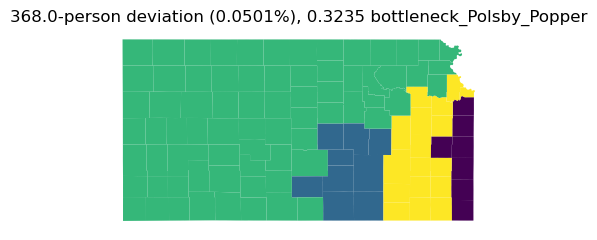

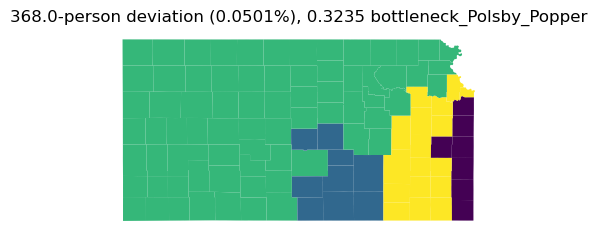

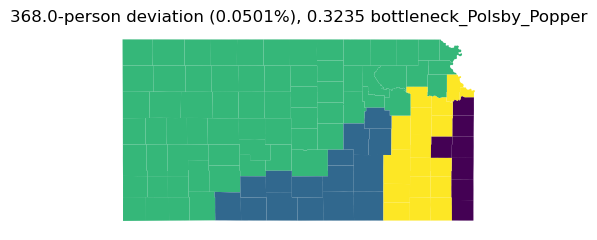

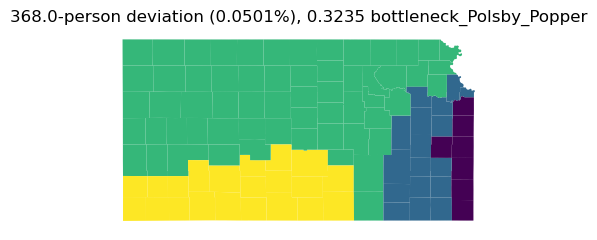

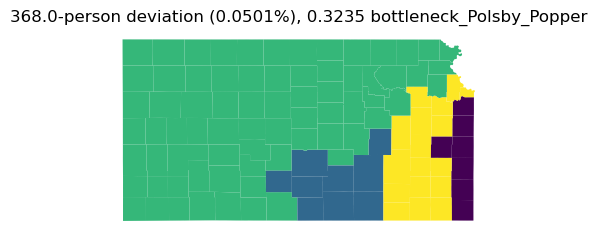

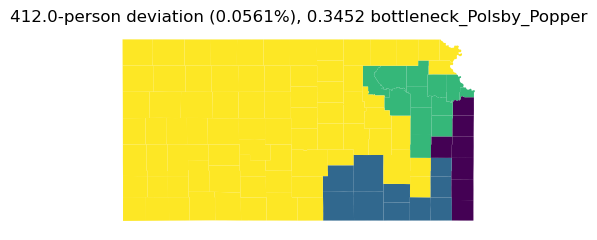

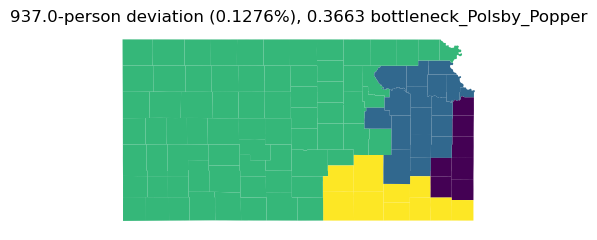

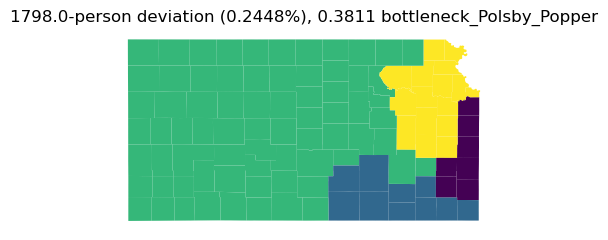

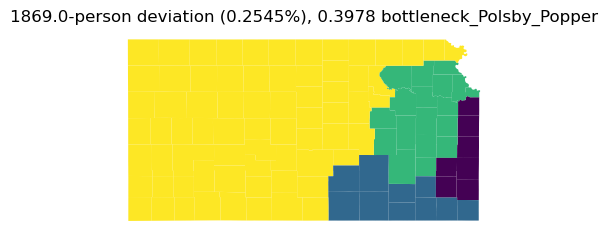

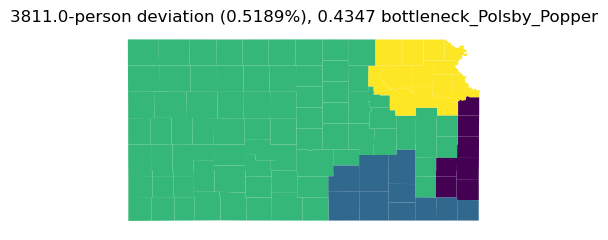

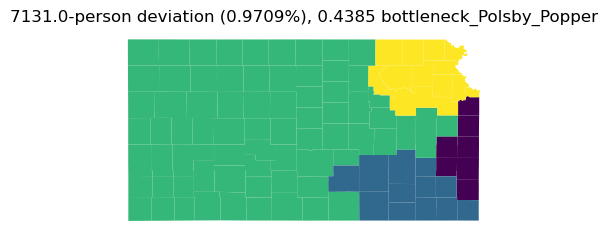

In [7]:
from pareto import ParetoFrontier

# set dummy values... (because compute_obj checks plan feasibility...)
G._L = 0 
G._U = G._k * ideal_population
pareto = dict()

obj_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']

for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    
    senses = ['min', 'max' if obj_type in ['average_Polsby_Popper', 'bottleneck_Polsby_Popper'] else 'min']
    obj_names = ['deviation_persons', obj_type]
    pareto[obj_type] = ParetoFrontier(senses, obj_names, state=state, level='county')
    
    for plan in plans:  
        dev = observed_deviation_persons(G, plan, ideal_population)
        obj = compute_obj(G, plan, obj_type)
        objs_val = [dev, obj]
        pareto[obj_type].add_plan(plan, upper_bound=objs_val)

    print("Pareto front objective values:", pareto[obj_type].upper_bounds)
    if infeasible_region is not None and infeasible_region[1] > 0.5:
        upper_bounds = pareto[obj_type].upper_bounds
        max_dev = max(upper_bound[0] for upper_bound in upper_bounds)
        max_obj = max(upper_bound[1] for upper_bound in upper_bounds)
        min_obj = min(upper_bound[1] for upper_bound in upper_bounds)
        o1lim=[-1, max_dev+100]
        o2lim=[min_obj*0.9, max_obj*(1.1)]
    else:
        o1lim = None
        o2lim = None
    
    pareto[obj_type].tighten_lower_bounds()       
    pareto[obj_type].plot_with_custom_x_ranges(method ='heuristic', splits=None,
                                              o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region)    
    pareto[obj_type].draw_plans(G, filepath, filename2)

In [8]:
len(plans)

27687

In [9]:
for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    print("Pareto front plans:", pareto[obj_type].plans)

***************************************
obj_type = cut_edges
***************************************
Pareto front plans: [[[5, 11, 13, 21, 28, 42, 45, 62, 65, 76], [6, 10, 12, 15, 18, 24, 27, 29, 30, 31, 37, 41, 46, 47, 58, 61, 63, 64, 70, 77, 78, 79, 89, 92, 95, 97, 103], [0, 1, 2, 3, 7, 8, 14, 16, 17, 19, 22, 23, 25, 34, 35, 36, 38, 39, 40, 43, 44, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 67, 68, 69, 71, 72, 73, 74, 75, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 93, 94, 96, 98, 99, 100, 101, 102, 104], [4, 9, 20, 26, 32, 33, 48, 66, 86]], [[5, 11, 13, 21, 28, 42, 45, 62, 65, 76], [6, 10, 12, 15, 18, 24, 27, 29, 30, 31, 37, 41, 51, 61, 63, 64, 70, 74, 77, 79, 83, 84, 93, 95, 97, 101, 103], [0, 1, 2, 3, 7, 8, 14, 16, 17, 19, 22, 23, 25, 34, 35, 36, 38, 39, 40, 43, 44, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 67, 68, 69, 71, 72, 73, 75, 78, 80, 81, 82, 85, 87, 88, 89, 90, 91, 92, 94, 96, 98, 99, 100, 102, 104], [4, 9, 20, 26, 32, 33, 48, 66, 86]], [[5, 11, 13, 14, 21, 28, 30]